# <center> Bike Sharing Assignment

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily -bike demands across the American market based on some factors. 

In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# Building a model
import statsmodels.api as sm

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluation  (finding R2)
from sklearn.metrics import r2_score

In [55]:
# Importing the data set
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
# Summarizing all the details of all variables.
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [57]:
# Verifying whether there are null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


<br><br><br><br>

# Data visualization <br>


<Figure size 1440x1440 with 0 Axes>

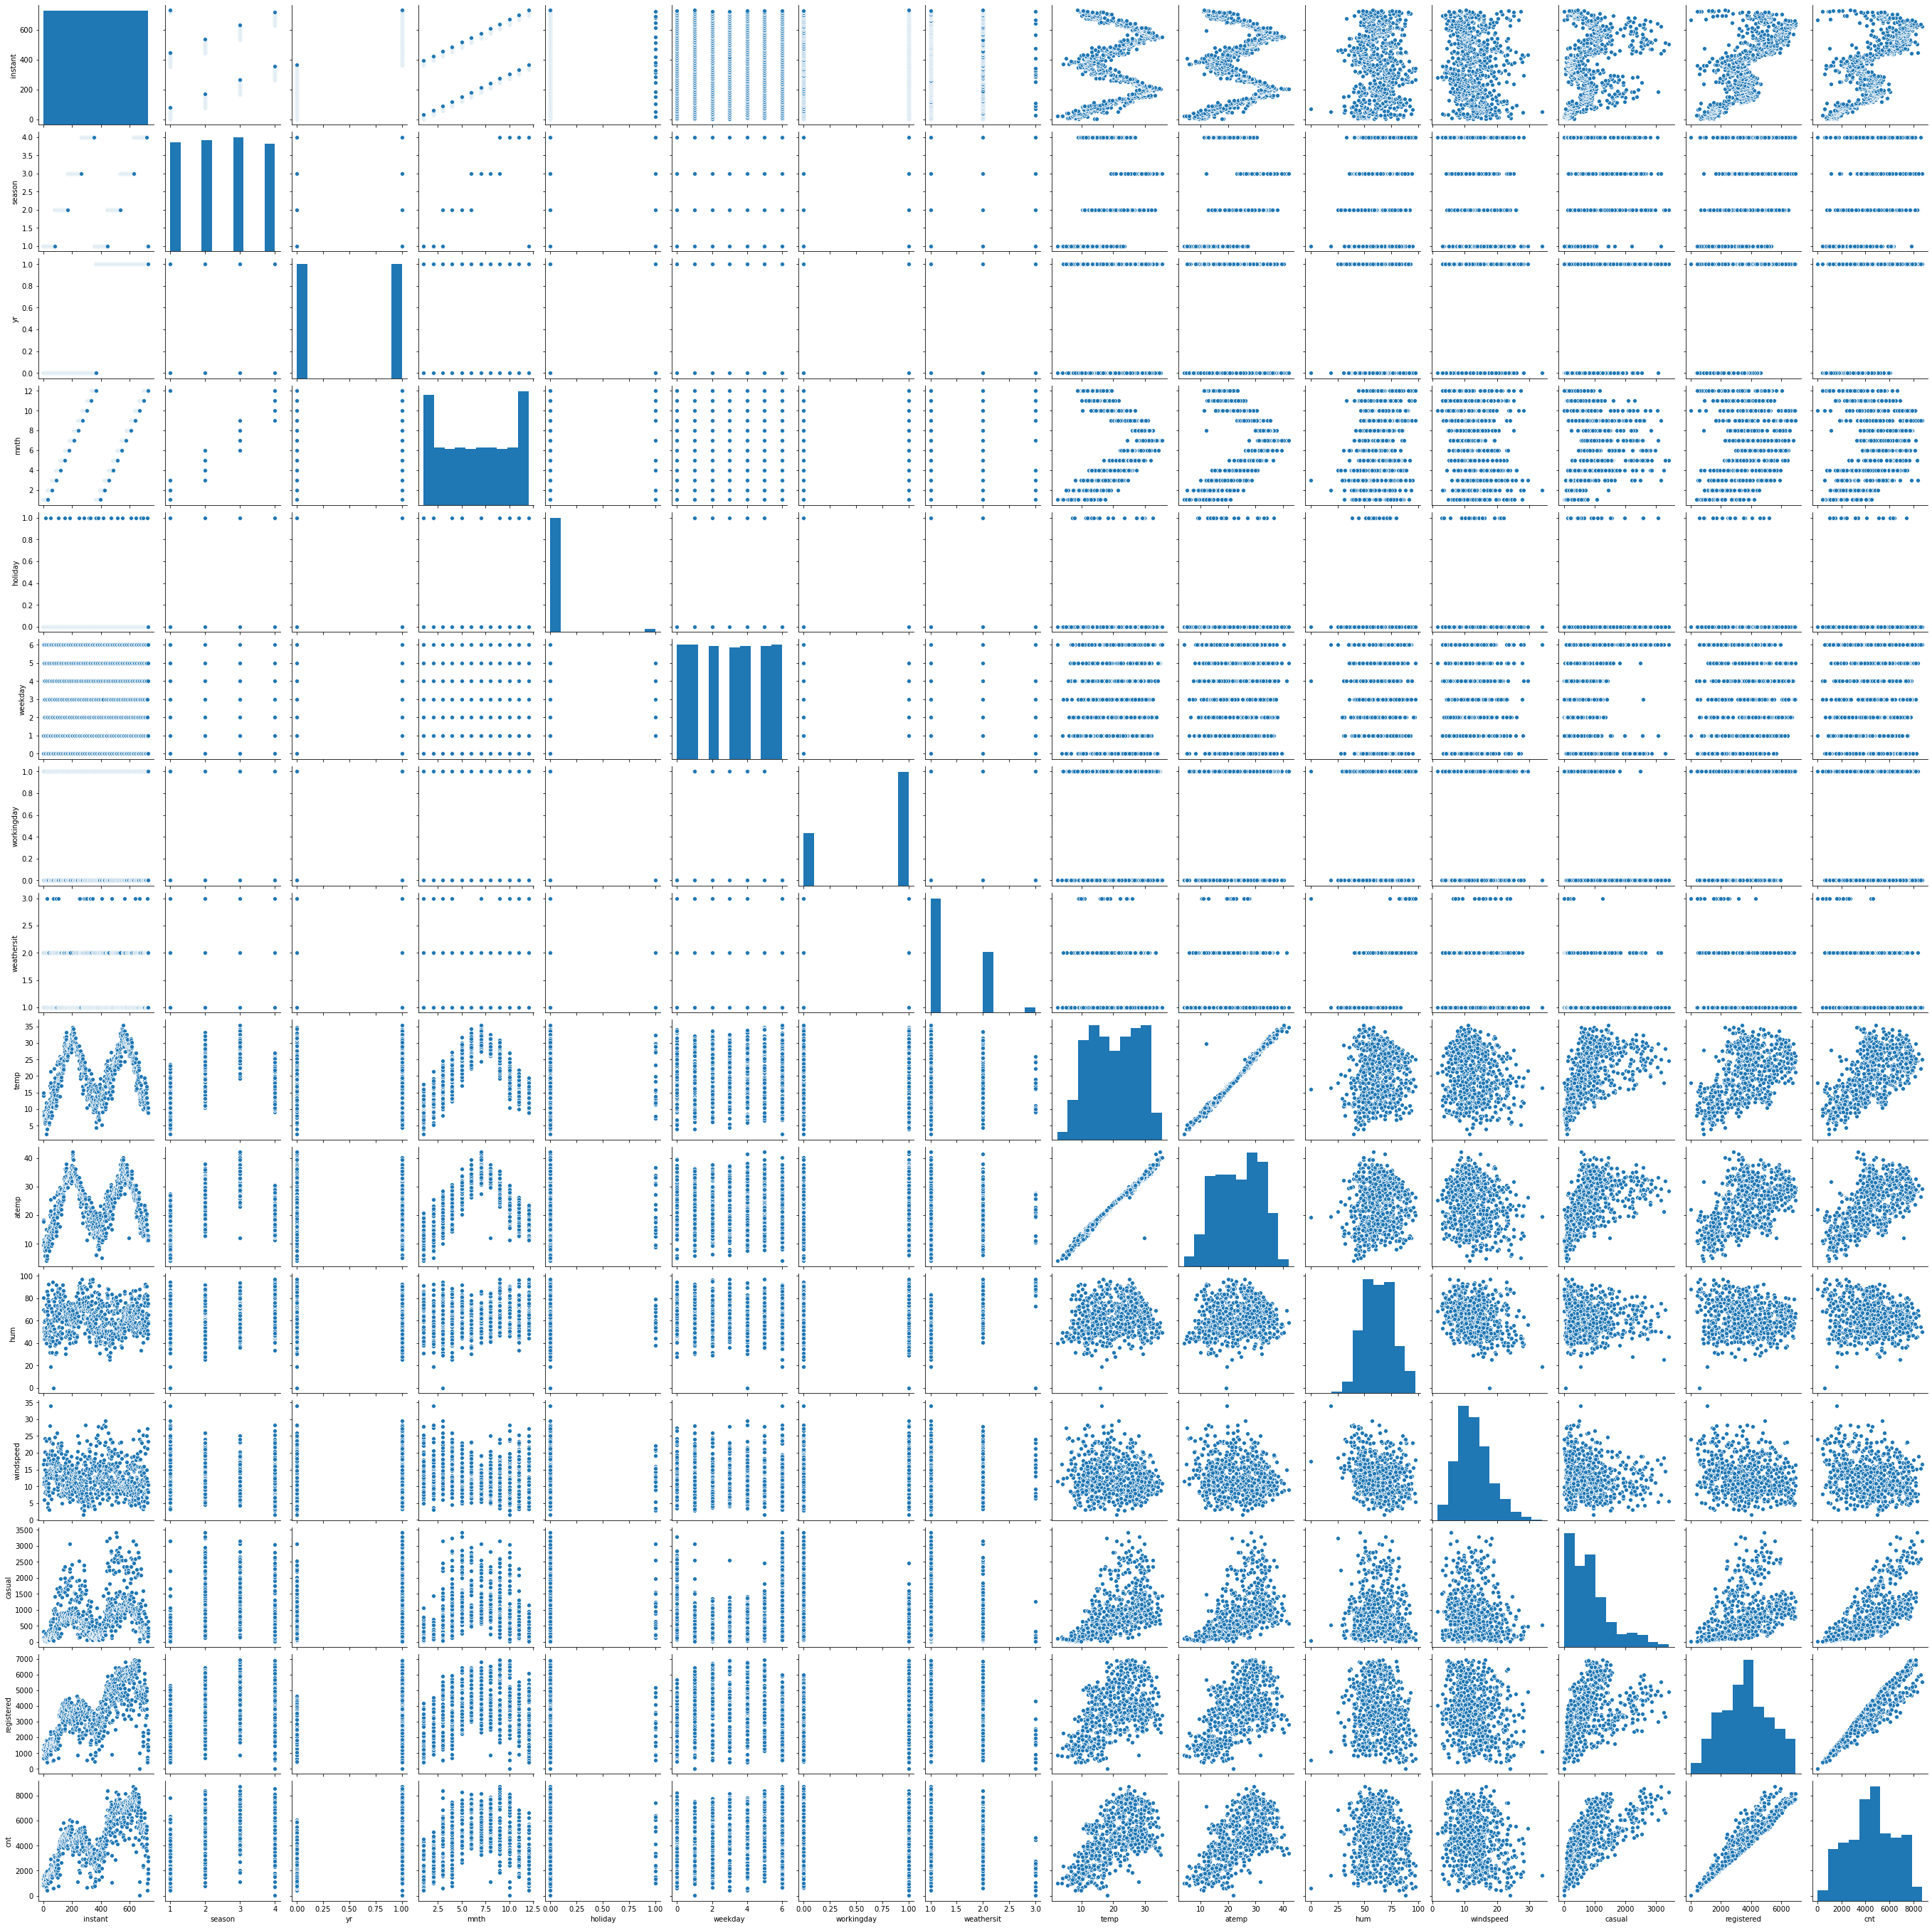

In [58]:
# Verifying the relation between all the variables using scatter plots.
plt.figure(figsize=[20,20])
sns.pairplot(data)

###### There are several variables that are categorical in nature when we observe in the plot. All the categorical variables plots are in straight lines. These variables need creating dummy variables.

<br>

<AxesSubplot:>

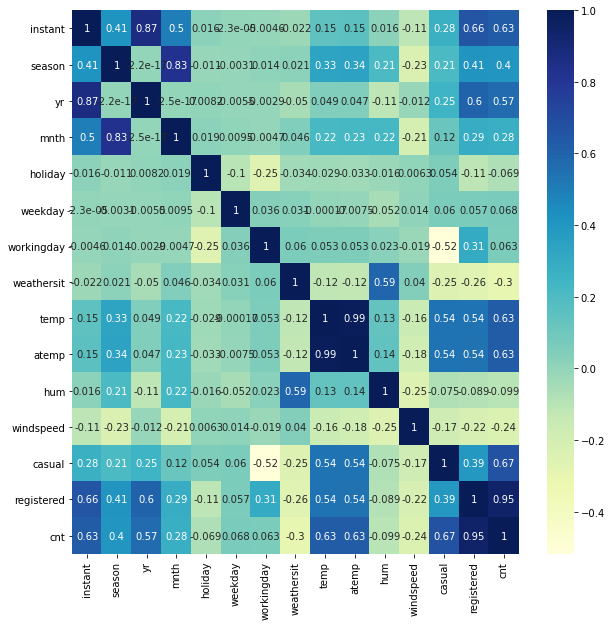

In [59]:
# Finding the corrilation value of all the variables.
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), annot=True , cmap='YlGnBu')

<br><br><br><br>
# =============================================================

# <center> Data Preparation

- Dropping unnecessory data
- Dropping highly corrilated data that are derived from the data visualization
- Creating Dummy Variables for categorical variables

### Dropping unnecessory data
There are some variables that does not add importance to the data for future predictions. They are instant, casual, registered, dteday. So dropping them wont effect the predictions.

    Instant - Does not add any importence.
    dteday - This feature is already explained by other features. So no need of it.
    casual, registered - These are the type of customers using per day. They also dont effect the future predictions

In [60]:
# Droping the unnecessary variables

data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

### Dropping highly corrilated data that are derived from the data visualization

In the given dataset we have two variables (atemp, temp) that are higly corrilated, i.e: corrilation value is nearly equal to zero. In this kind of situation considering only one variable will be enough. So drop one of them.

In [61]:
# Dropping atemp variable

data = data.drop(['atemp'], axis=1)

In [62]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Creating Dummy Variables for categorical variables

As we mentioned before in the pairplot section, we need to create dummy variables for some of the categorical variables. They are Season, month, weekday, weathersit.

In [63]:
# We first create categorical variables , replacing the numerics with actual data.

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.weekday = data.weekday.map({0:'tuesdata', 1:'wednesdata', 2:'thursdata', 3:'fridata',4:'saturdata',5:'sundata',6:'mondata'})
data.mnth = data.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist+cloudy',3:'Light snow',4:'Heavy snow'})

In [64]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,mondata,0,Mist+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tuesdata,0,Mist+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wednesdata,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thursdata,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,fridata,1,Clear,9.305237,43.6957,12.522300,1600


In [65]:
# Creating Dummy variables for Season, month, weekday, weathersit features.

dummies = pd.get_dummies(data[['season', 'mnth', 'weekday', 'weathersit']] , drop_first = True)
dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mondata,weekday_saturdata,weekday_sundata,weekday_thursdata,weekday_tuesdata,weekday_wednesdata,weathersit_Light snow,weathersit_Mist+cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Now concat these dummies with the actual dataset. And drop the categorical variables.

# Concating dummies to data (axis=1, i.e: adding columns) and dropng the categorical values at the same time.
data = pd.concat([data, dummies], axis=1 ).drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)


### Splitting the data

In [67]:
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

###  scaling the features

In [68]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mondata,weekday_saturdata,weekday_sundata,weekday_thursdata,weekday_tuesdata,weekday_wednesdata,weathersit_Light snow,weathersit_Mist+cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mondata,weekday_saturdata,weekday_sundata,weekday_thursdata,weekday_tuesdata,weekday_wednesdata,weathersit_Light snow,weathersit_Mist+cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [70]:
# Creating the object for MinMaxScaler()
scaler = MinMaxScaler()

# Using the obj to access the method from MinMax and perform scaling
data_train[data_train.columns] = scaler.fit_transform(data_train[data_train.columns])

In [71]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mondata,weekday_saturdata,weekday_sundata,weekday_thursdata,weekday_tuesdata,weekday_wednesdata,weathersit_Light snow,weathersit_Mist+cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br><br><br><br>
# =============================================================

# <center> Building the model

In [72]:
# Splitting X and Y
y_train= data_train.pop('cnt')
X_train = data_train

In [73]:
# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())


# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.74e-182
Time:                        18:38:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Here the no of variables to be eliminated are too high. So we use automated Feature selection method i.e: RFE 

For that we need to build a model using Sklearn

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model = sk_model.fit( X_train, y_train)

rfe = RFE(sk_model , 15)
rfe = rfe.fit( X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_mondata', True, 1),
 ('weekday_saturdata', False, 12),
 ('weekday_sundata', False, 10),
 ('weekday_thursdata', False, 8),
 ('weekday_tuesdata', True, 1),
 ('weekday_wednesdata', False, 7),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist+cloudy', True, 1)]

In [75]:
# The selected features from the RFE process are 

X_train = X_train[X_train.columns[rfe.support_]]

### Re-Build the model using the new training set using statsmodel

In [76]:
# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())



# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.13e-191
Time:                        18:38:25   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### The holiday variable has high p value and low VIF value. So, lets eliminate it andsee the changes.

In [77]:
# Dropping the extra feature
X_train.drop('holiday', inplace = True, axis=1)


# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())


# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.13e-191
Time:                        18:38:25   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Now all the P-values are set but the VIF value of the variable "hum" > 10 which is a bad sign. So, drop it.

In [78]:
# Dropping the extra feature
X_train.drop('hum', inplace = True, axis=1)


# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())


# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.73e-189
Time:                        18:38:25   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Still there are 2 features 'workingday' and 'temp' that has VIF>10. So, drop them one by one checking the changes in VIF.

In [79]:
# Dropping the extra feature
X_train.drop('workingday', inplace = True, axis=1)


# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())


# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.01e-186
Time:                        18:38:25   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Now weekday_mondata has high p value. drop it

In [80]:
# Dropping the extra feature
X_train.drop('weekday_mondata', inplace = True, axis=1)


# Building a model from statsmodel
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())


# Calcilating VIF values
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF = VIF.sort_values(by = "vif", ascending = False)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.65e-187
Time:                        18:38:25   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

<br><br><br><br>

### Now lets calculate the $R^2$ value for the actual and predicted values for the training set.

In [81]:
# Predicted value of the training data.
y_train_pred = model.predict(X_train_lm)

In [82]:
# Calculating the R2 value for the 
from sklearn.metrics import r2_score

r2_score(y_true=y_train , y_pred=y_train_pred)

0.8360233701515918

Text(0.5, 0, 'Errors')

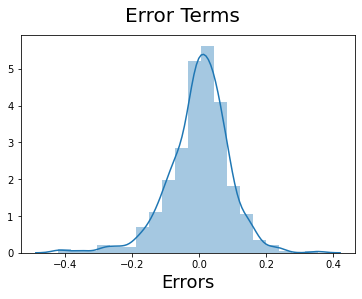

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

Text(0, 0.5, 'Residuals')

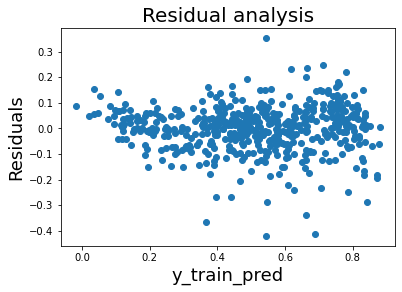

In [99]:
# Error terms are independent of each other
residuals = y_train - y_train_pred
plt.scatter( y_train_pred,residuals)
plt.title('Residual analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train_pred', fontsize = 18)  
plt.ylabel('Residuals', fontsize = 18)  

<br><br><br>

# Testing and Evaluation

In [84]:

data_test[data_test.columns] = scaler.transform(data_test[data_test.columns])


In [85]:
data_test['yr']

184    0.0
535    1.0
299    0.0
221    0.0
152    0.0
      ... 
400    1.0
702    1.0
127    0.0
640    1.0
72     0.0
Name: yr, Length: 219, dtype: float64

In [86]:
# Splitting X,y

y_test = data_test.pop('cnt')
X_test = data_test

In [87]:
X_test_lm = sm.add_constant(X_test)

X_test_lm = X_test_lm[X_train_lm.columns]
X_test_lm

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_tuesdata,weathersit_Light snow,weathersit_Mist+cloudy
184,1.0,0.0,0.831783,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
535,1.0,1.0,0.901354,0.153728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1.0,0.0,0.511964,0.334206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
221,1.0,0.0,0.881625,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.817246,0.537414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1.0,0.257562,0.287411,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
702,1.0,1.0,0.519232,0.283397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
127,1.0,0.0,0.584649,0.069510,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
640,1.0,1.0,0.745598,0.052115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [88]:
y_test_pred = model.predict(X_test_lm)

r2_score(y_true = y_test, y_pred = y_test_pred)

0.805407680173852

Text(0.5, 0, 'Errors')

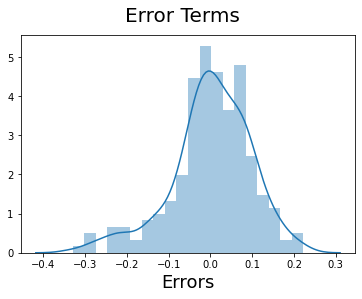

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

Text(0, 0.5, 'y_pred')

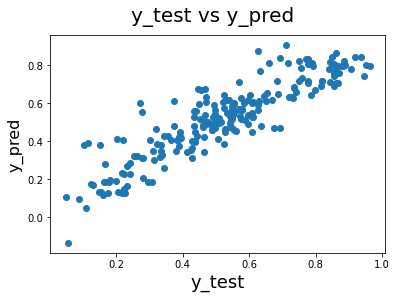

In [90]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      